### **X ESAME**:
- dare introduzione per inizio
- spiegare bene ciò che abbiamo fatto
- consegnare presentaizone, report e notebook
- discutere alla fine in maniera critica possbili direzioni o miglioramenit 

<div align="center">

# **Wearable Devices Project**

### *Joint Programme in Health Informatics*  
**Vita-Salute San Raffaele University**  
**Politecnico di Milano**

---

### **Academic Year 2025–2026**

</div>

<div style="color:#7a7a7a">

##### **Authors**

- **Giulia Caffi** — Background: *MSc in Medicine and Surgery*  
- **Rebecca Metallo** — Background: *BSc in Mathematical and Computing Sciences for Artificial Intelligence*  
- **Anna Uberti** — Background: *BSc in Medical Radiology Techniques*

</div>



<div style="margin-top:20px; margin-bottom:20px; padding:18px; 
            border-left:4px solid #6c6c6c; background:#f7f7f7;">

### <span style="color:#4a4a4a;">**Research Question**</span>

Is it possible to **predict how much an individual becomes stressed relative to their own baseline level**, using only physiological data collected during the **Stress Induction Protocol**

and a set of simple  subject-related variables?

The two protocols analyzed are the following ones:

</div>



<div align="center">

<img src="download.png" width="650">

</div>


## **Libraries Needed**

In [1]:
# Install missing package so imports below resolve
%pip install statsmodels
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, r2_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
import random
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import kurtosis, skew, shapiro, chi2_contingency, levene, kruskal, ttest_ind, ttest_ind, pearsonr
import os
import datetime
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from xgboost import XGBClassifier  # pip install xgboost se manca
from sklearn.metrics import r2_score, mean_squared_error

Note: you may need to restart the kernel to use updated packages.


## **Exploratory Data Analysis : EDA**

### **Understanding Population**

In [2]:
stress_level_v1 = pd.read_csv('Stress_Level_v1.csv')
stress_level_v2 = pd.read_csv('Stress_Level_v2.csv')
subject_info    = pd.read_csv('subject-info.csv')

In [3]:
subject_info.head(36)

,Info,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise
0,S01,m,21,192,84,Yes,V1,Yes,Yes,Yes****
1,S02,m,20,185,95,No,V1,Yes****,Yes,Yes
2,S03,m,20,175,62,Yes,V1,Yes,Yes***,Yes
3,S04,m,21,174,70,Yes,V1,Yes,Yes,Yes
4,S05,m,21,173,72,Yes,V1,Yes,Yes,Yes
5,S06,m,21,172,70,Yes,V1,Yes,Yes,Yes***
6,S07,m,19,184,88,Yes,V1,Yes,Yes***,Yes
7,S08,m,20,174,67,Yes,V1,Yes,Yes,Yes
8,S09,m,19,174,63,Yes,V1,Yes,Yes,Yes
9,S10,m,21,180,80,Yes,V1,Yes,Yes,Yes


In [4]:

subject_v1 = subject_info[subject_info["Protocol"] == "V1"].copy()
subject_v2 = subject_info[subject_info["Protocol"] == "V2"].copy()

print("N soggetti V1:", len(subject_v1))
print("N soggetti V2:", len(subject_v2))


N soggetti V1: 18
N soggetti V2: 18


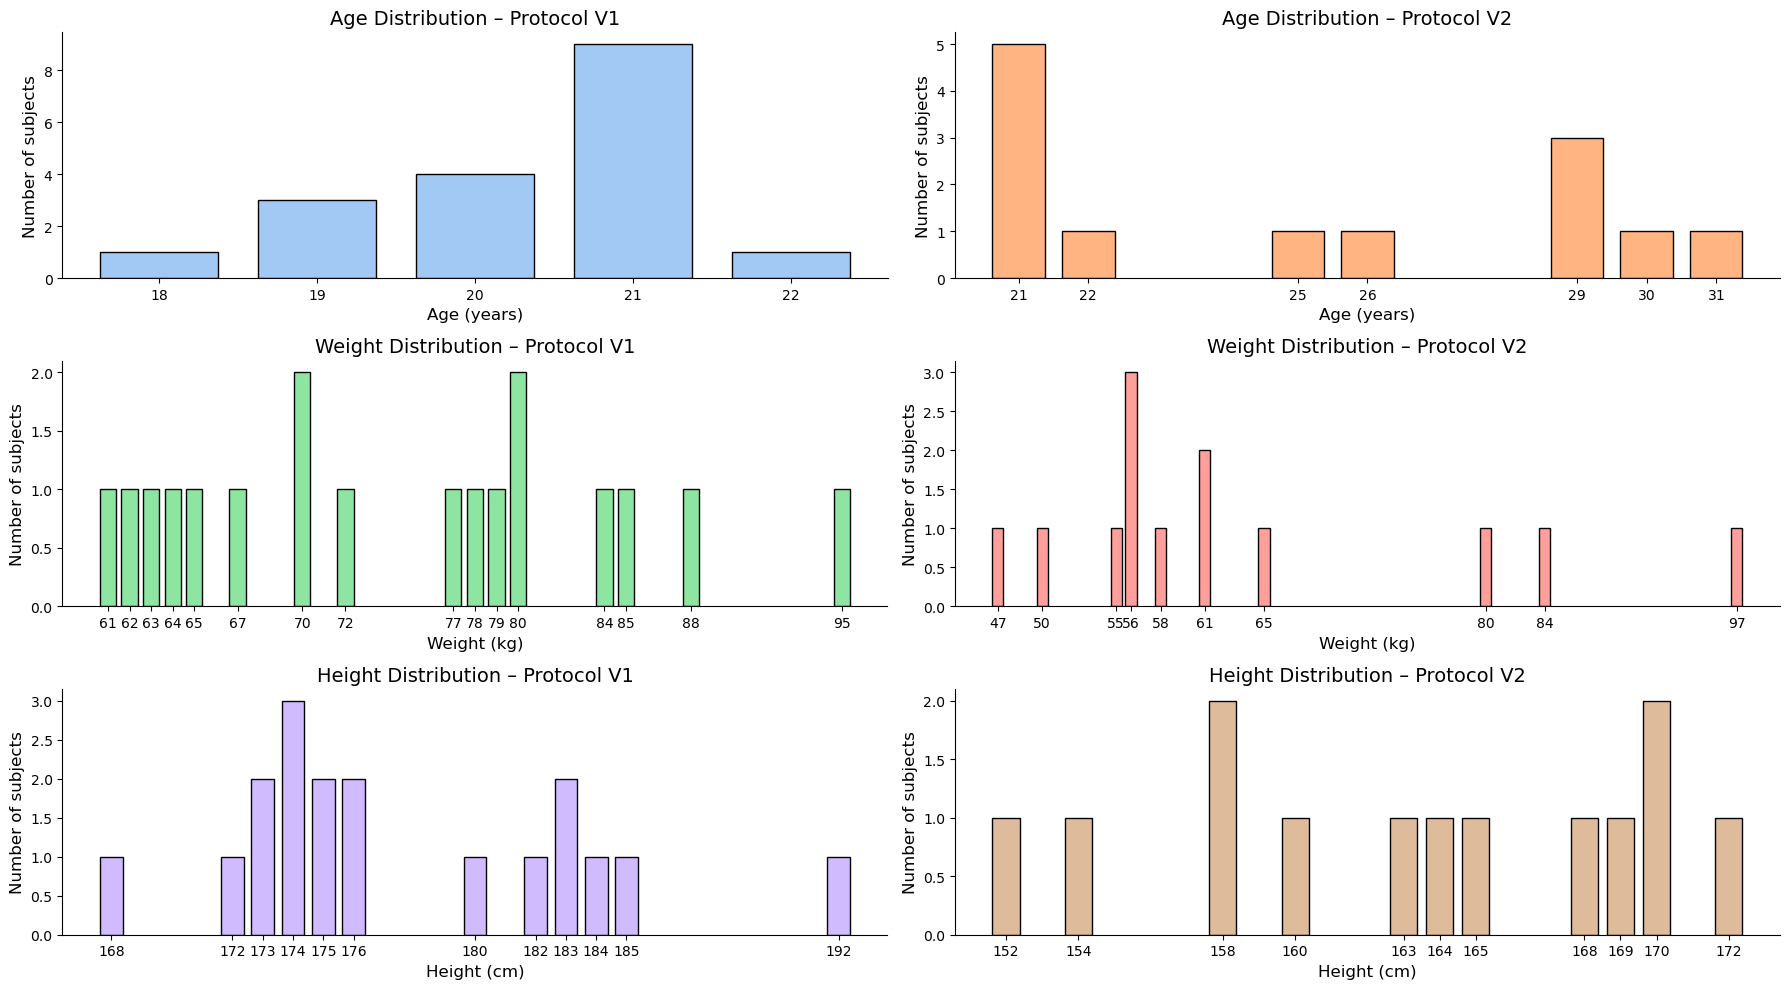

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Global style for elegance ---
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.figsize": (18, 10)   # space for 2 plots per row
})

# Pastel color palette (vibrant but soft)
PASTEL_COLORS = ["#a1c9f4", "#ffb482", "#8de5a1", 
                 "#ff9f9b", "#d0bbff", "#debb9b"]

def plot_discrete_distribution(ax, series, title, xlabel, color):
    """
    Plot discrete numerical distributions on a given axis with pastel colors.
    """

    s = pd.to_numeric(series, errors="coerce").dropna()
    counts = s.value_counts().sort_index()

    ax.bar(
        counts.index,
        counts.values,
        width=0.75,
        color=color,
        edgecolor="black"
    )

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of subjects")
    ax.set_xticks(counts.index)


# ------- Create grid layout (2x3) -------

fig, axes = plt.subplots(3, 2)
axes = axes.flatten()  # flatten for easy indexing

# --- Plot definitions ---
plot_specs = [
    (subject_v1["Age"], "Age Distribution – Protocol V1", "Age (years)"),
    (subject_v2["Age"], "Age Distribution – Protocol V2", "Age (years)"),
    (subject_v1["Weight (kg)"], "Weight Distribution – Protocol V1", "Weight (kg)"),
    (subject_v2["Weight (kg)"], "Weight Distribution – Protocol V2", "Weight (kg)"),
    (subject_v1["Height (cm)"], "Height Distribution – Protocol V1", "Height (cm)"),
    (subject_v2["Height (cm)"], "Height Distribution – Protocol V2", "Height (cm)")
]

# --- Generate the 6 plots ---
for i, (series, title, xlabel) in enumerate(plot_specs):
    plot_discrete_distribution(
        axes[i],
        series,
        title,
        xlabel,
        PASTEL_COLORS[i % len(PASTEL_COLORS)]
    )

plt.tight_layout()
plt.show()


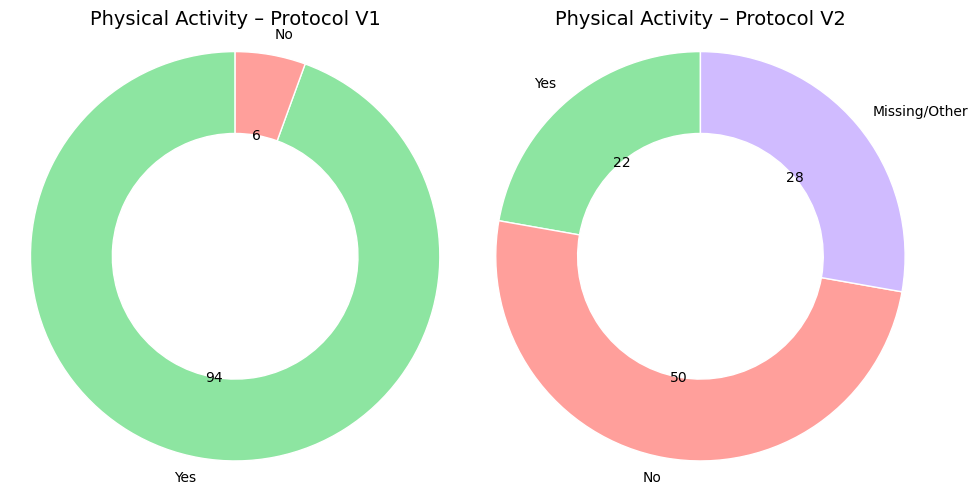

In [6]:


COL_NAME = "Does physical activity regularly?"

def get_activity_counts(df, col=COL_NAME):
    s = df[col].astype(str).str.strip().str.lower()

    yes_count = int((s == "yes").sum())
    no_count = int((s == "no").sum())

    # Missing = tutto ciò che non è "yes" o "no"
    missing_count = int(len(s) - yes_count - no_count)
    
    labels = ["Yes", "No", "Missing/Other"]
    values = [yes_count, no_count, missing_count]

    # ❗ Remove missing/other if count is zero
    clean_labels = []
    clean_values = []
    for lab, val in zip(labels, values):
        if val > 0:
            clean_labels.append(lab)
            clean_values.append(val)

    return clean_labels, clean_values


def plot_activity_donut(ax, df, title):
    labels, values = get_activity_counts(df)

    # Pastel colors (automatically adapted to number of classes)
    pastel_palette = ["#8de5a1", "#ff9f9b", "#d0bbff"]
    colors = pastel_palette[:len(labels)]

    wedges, texts, autotexts = ax.pie(
        values,
        labels=labels,
        colors=colors,
        autopct="%1.0f",
        startangle=90,
        wedgeprops=dict(width=0.40, edgecolor="white")
    )
    ax.set_title(title, fontsize=14)
    ax.axis("equal")  # Keep donut circular


# ---- FIGURE WITH TWO DONUTS ----
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_activity_donut(axes[0], subject_v1, "Physical Activity – Protocol V1")
plot_activity_donut(axes[1], subject_v2, "Physical Activity – Protocol V2")

plt.tight_layout()
plt.show()


### **Understanding Data & Cleaning it**

##### <u>**1st Step — Define the functions required to load and visualize the physiological signals**</u>


In this step, we implement all the necessary functions to:

- properly read and preprocess the physiological signals,  
- generate clear and interpretable visualizations in which the **protocol phases** are explicitly highlighted,  
- align each signal to the **onset of the protocol**, rather than to the start of the raw recording,  
- and ensure that only the relevant segments (i.e., from protocol start onward) are displayed in the plots.

This allows the visual analysis to focus on the meaningful portion of the data and ensures that the plotted signals are fully synchronized with the experimental procedure.


In [7]:


dataset_path='Wearable_Dataset'#replace the folder path 

def moving_average(acc_data):
    # Initialization of variables
    avg = 0
    prevX, prevY, prevZ = 0, 0, 0
    results = []
    # Each second (32 samples) the acceleration data is summarized using the following method:
    for i in range(0, len(acc_data), 32):
        sum_ = 0
        buffX = acc_data[i:i+32, 0]
        buffY = acc_data[i:i+32, 1]
        buffZ = acc_data[i:i+32, 2]
        
        for j in range(len(buffX)):
            sum_ += max(
                abs(buffX[j] - prevX),
                abs(buffY[j] - prevY),
                abs(buffZ[j] - prevZ)
            )
            prevX, prevY, prevZ = buffX[j], buffY[j], buffZ[j]
        #The output is then filtered:
        avg = avg * 0.9 + (sum_ / 32) * 0.1 #
        results.append(avg)
    
    return results


def graph_multiple(signals,timeline,subject_signals,state):

    plt.figure(figsize=(25,15))

    keys = list(signals[subject_signals].keys())
    keys.remove("tags")

    i=1
    
    for key in keys:
        plt.subplot(len(keys),1,i)
        if i==1:
            plt.title(subject_signals + "  -  "+state)
        if key=='ACC':
            acc=moving_average(signals[subject_signals][key])
            plt.plot(acc,label=key)
        else:
            plt.plot(timeline[subject_signals][key],signals[subject_signals][key],label=key)
        
        for tag in signals[subject_signals]["tags"][1:]:
            plt.axvline(x=tag, color='r', linestyle='-')

        if state=='STRESS' and signals[subject_signals]["tags"]:
            if 'S' in subject_signals: #first version
                plt.axvspan(signals[subject_signals]["tags"][2], signals[subject_signals]["tags"][3], color='green', alpha=0.2) #baseline
                plt.axvspan(signals[subject_signals]["tags"][3], signals[subject_signals]["tags"][4], color='yellow', alpha=0.2) #stroop
                plt.axvspan(signals[subject_signals]["tags"][4], signals[subject_signals]["tags"][5], color='orange', alpha=0.2) #first rest
                plt.axvspan(signals[subject_signals]["tags"][5], signals[subject_signals]["tags"][6], color='yellow', alpha=0.2)# tmct
                plt.axvspan(signals[subject_signals]["tags"][6], signals[subject_signals]["tags"][7], color='orange', alpha=0.2) #second rest
                plt.axvspan(signals[subject_signals]["tags"][7], signals[subject_signals]["tags"][8], color='yellow', alpha=0.2)#real opinion
                plt.axvspan(signals[subject_signals]["tags"][9], signals[subject_signals]["tags"][10], color='yellow', alpha=0.2)#opposite opinion
                plt.axvspan(signals[subject_signals]["tags"][11], signals[subject_signals]["tags"][12], color='yellow', alpha=0.2)#subtract test

            else: #second version
                plt.axvspan(signals[subject_signals]["tags"][1], signals[subject_signals]["tags"][2], color='green', alpha=0.2) #baseline
                plt.axvspan(signals[subject_signals]["tags"][2], signals[subject_signals]["tags"][3], color='yellow', alpha=0.2) #tmct
                plt.axvspan(signals[subject_signals]["tags"][3], signals[subject_signals]["tags"][4], color='orange', alpha=0.2) #first rest
                plt.axvspan(signals[subject_signals]["tags"][4], signals[subject_signals]["tags"][5], color='yellow', alpha=0.2)#real opinion
                plt.axvspan(signals[subject_signals]["tags"][6], signals[subject_signals]["tags"][7], color='yellow', alpha=0.2)#opposite opinion
                plt.axvspan(signals[subject_signals]["tags"][7], signals[subject_signals]["tags"][8], color='orange', alpha=0.2) #second rest
                plt.axvspan(signals[subject_signals]["tags"][8], signals[subject_signals]["tags"][9], color='yellow', alpha=0.2)#subtract test
        
        plt.legend()
        plt.grid()
        i = i+1  
    plt.show()


# create a vector from the data frame (signal imported by pandas)
def create_df_array(dataframe):
    matrix_df=dataframe.values
    # returns 2-d matrix
    matrix = np.array(matrix_df)
    array_df = matrix.flatten()# Convert matrix into an array
    return array_df

# convert UTC arrays to arrays in seconds relative to 0 (record beginning)
def time_abs_(UTC_array):
    new_array=[]
    for utc in UTC_array:
        time=(datetime.datetime.strptime(utc,'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(UTC_array[0], '%Y-%m-%d %H:%M:%S')).total_seconds()
        new_array.append(int(time))
    return new_array



In [8]:


def read_signals(main_folder):
    signal_dict = {}
    time_dict = {}
    fs_dict = {}

    # Get a list of subfolders in the main folder
    subfolders = next(os.walk(main_folder))[1]

    utc_start_dict={}
    for folder_name in subfolders:
            csv_path = f'{main_folder}/{folder_name}/EDA.csv'
            df=pd.read_csv(csv_path)
            utc_start_dict[folder_name]= df.columns.tolist()

    # Iterate over the subfolders
    for folder_name in subfolders:
        folder_path = os.path.join(main_folder, folder_name)
        # Get a list of files in the subfolder
        files = os.listdir(folder_path)

        # Initialize a dictionary for the signals in the current subfolder
        signals = {}
        time_line = {}
        fs_signal= {}
        
        # Define the list of desired file names
        desired_files = ['EDA.csv', 'BVP.csv', 'HR.csv', 'TEMP.csv','tags.csv','ACC.csv']
   
        # Iterate over the files in the subfolder
        for file_name in files:
            file_path = os.path.join(folder_path, file_name)

            # Check if it's a CSV file and if it is in the desired files list
            if file_name.endswith('.csv') and file_name in desired_files:
                # Read the CSV file and store the signal data

                if file_name == 'tags.csv':
                    try:
                        df = pd.read_csv(file_path,header=None)
                        tags_vector = create_df_array(df)
                        tags_UTC_vector =np.insert(tags_vector,0,utc_start_dict[folder_name])
                        signal_array=time_abs_(tags_UTC_vector)
                    except pd.errors.EmptyDataError:
                        signal_array=[]
                
                else:
                    df = pd.read_csv(file_path)
                    fs= df.loc[0]
                    fs=int(fs[0])# Get sampling frequency
                    df.drop([0],axis = 0,inplace=True) 
                    signal_array = df.values
                    time_array = np.linspace(0, len(signal_array)/fs,len(signal_array))

                signal_name = file_name.split('.')[0]
                signals[signal_name] = signal_array
                time_line[signal_name] = time_array
                fs_signal[signal_name] = fs

        # Store the signals of the current subfolder in the main dictionary
        signal_dict[folder_name] = signals
        time_dict[folder_name] = time_line
        fs_dict[folder_name] = fs_signal

    return signal_dict, time_dict, fs_dict


In [9]:
states = ["STRESS"]   # CI SERVE SOLO STRESS PER I MODELLI

signal_data  = {}
time_data    = {}
fs_dict      = {}
participants = {}

for state in states:
    folder_path = f"{dataset_path}/{state}"
    participants[state] = os.listdir(folder_path)
    print(f"\n=== LOADING STATE: {state} ===")
    signal_data[state], time_data[state], fs_dict[state] = read_signals(folder_path)



=== LOADING STATE: STRESS ===


/var/folders/yq/x3pvkzds25zgvc7cbf8h1lwc0000gn/T/ipykernel_53998/1355789405.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fs=int(fs[0])# Get sampling frequency
/var/folders/yq/x3pvkzds25zgvc7cbf8h1lwc0000gn/T/ipykernel_53998/1355789405.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fs=int(fs[0])# Get sampling frequency
/var/folders/yq/x3pvkzds25zgvc7cbf8h1lwc0000gn/T/ipykernel_53998/1355789405.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

##### <u>**2nd Step — Getting Trends**</u>

In this step, we implemented a series of visualisations designed to explore how self-reported stress evolves across the different tests of the protocol.  



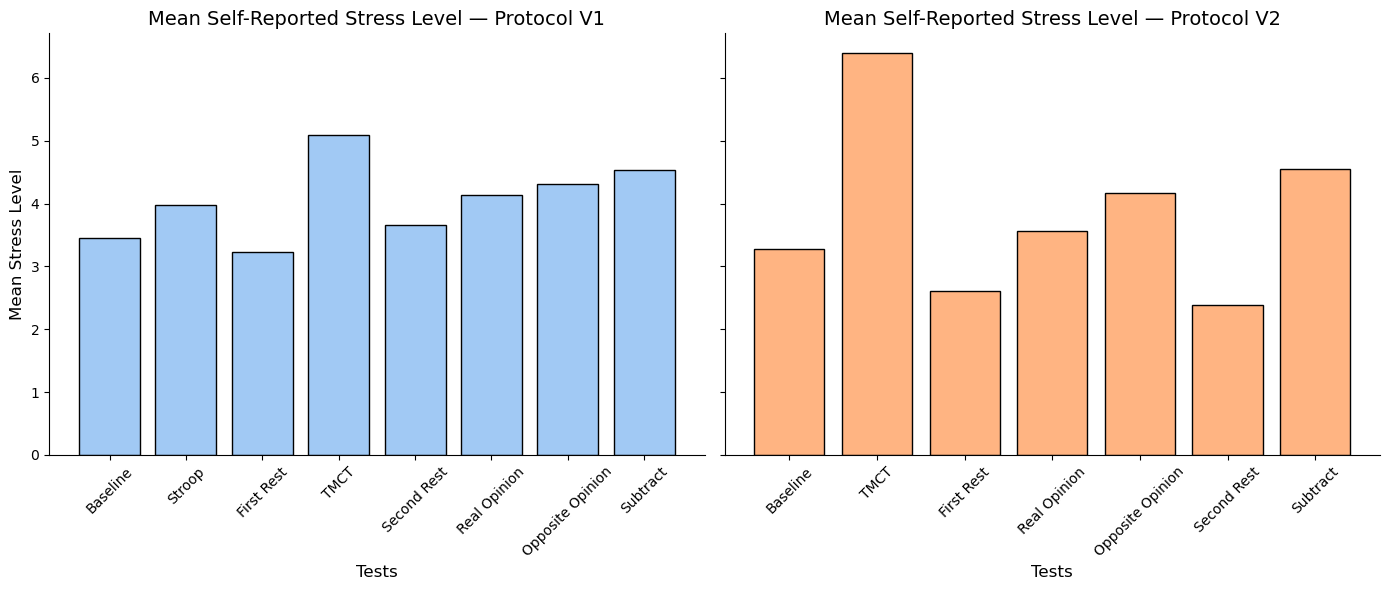

In [10]:
color_v1 = "#A1C9F4"   # pastel blue
color_v2 = "#FFB482"   # pastel orange


mean_v1 = stress_level_v1.mean(numeric_only=True)
mean_v2 = stress_level_v2.mean(numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# ---------------------
# Protocol V1
# ---------------------
axes[0].bar(mean_v1.index, mean_v1.values, color=color_v1, edgecolor="black")
axes[0].set_title("Mean Self-Reported Stress Level — Protocol V1")
axes[0].set_xlabel("Tests")
axes[0].set_ylabel("Mean Stress Level")
axes[0].tick_params(axis='x', rotation=45)

# ---------------------
# Protocol V2
# ---------------------
axes[1].bar(mean_v2.index, mean_v2.values, color=color_v2, edgecolor="black")
axes[1].set_title("Mean Self-Reported Stress Level — Protocol V2")
axes[1].set_xlabel("Tests")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

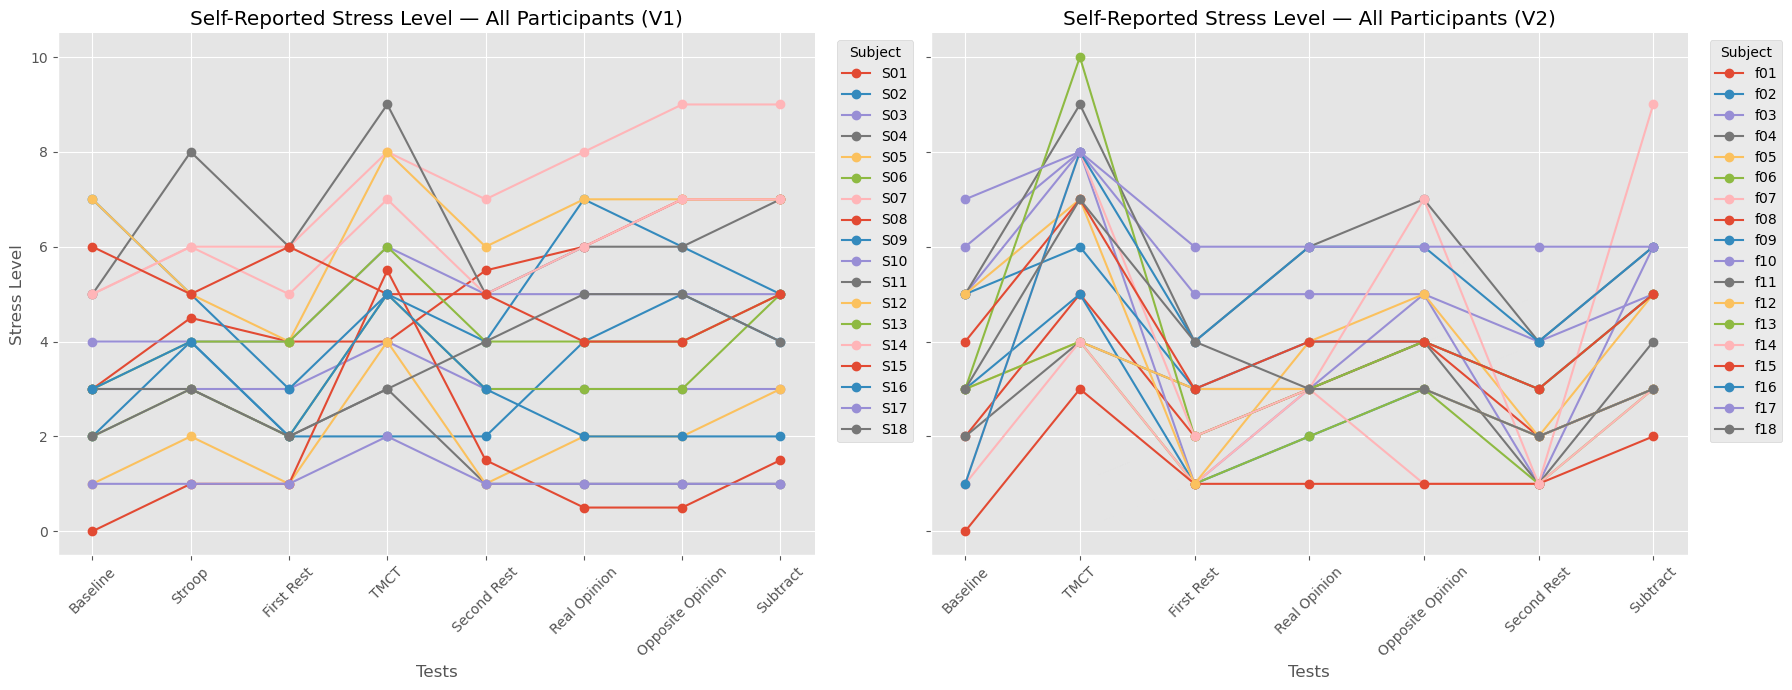

In [11]:

plt.style.use("ggplot")
v1 = stress_level_v1.set_index("Unnamed: 0")
v2 = stress_level_v2.set_index("Unnamed: 0")

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# ============================
# Protocol V1
# ============================
x_v1 = np.arange(len(v1.columns))
labels_v1 = v1.columns

for subj, row in v1.iterrows():
    axes[0].plot(x_v1, row.values, marker="o", label=subj)

axes[0].set_title("Self-Reported Stress Level — All Participants (V1)")
axes[0].set_xlabel("Tests")
axes[0].set_ylabel("Stress Level")
axes[0].set_xticks(x_v1)
axes[0].set_xticklabels(labels_v1, rotation=45)
axes[0].legend(title="Subject", bbox_to_anchor=(1.02, 1), loc="upper left")

# ============================
# Protocol V2
# ============================
x_v2 = np.arange(len(v2.columns))
labels_v2 = v2.columns

for subj, row in v2.iterrows():
    axes[1].plot(x_v2, row.values, marker="o", label=subj)

axes[1].set_title("Self-Reported Stress Level — All Participants (V2)")
axes[1].set_xlabel("Tests")
axes[1].set_xticks(x_v2)
axes[1].set_xticklabels(labels_v2, rotation=45)
axes[1].legend(title="Subject", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


##### <u>**3rd Step — Segmenting the Data and Building the Analysis Dataset**</u>

Tag Mapping for Protocol Stages (Consistent with E4 Plots)

> **Notes:**  
> • `tags[0] = 0 seconds` → start of the recording (not part of the protocol)  
> • The indexes below correspond to tag positions used in the signal plots.  
> • Tag sequences differ slightly between Version 1 (Sxx) and Version 2 (fxx).


<div style="display: flex; gap: 40px;">

<div style="flex: 1;">

**Version 1 (Subjects “Sxx”)**

| Stage              | Start Tag  | End Tag    |
|--------------------|------------|------------|
| Baseline           | `tags[2]`  | `tags[3]`  |
| Stroop             | `tags[3]`  | `tags[4]`  |
| First Rest         | `tags[4]`  | `tags[5]`  |
| TMCT               | `tags[5]`  | `tags[6]`  |
| Second Rest        | `tags[6]`  | `tags[7]`  |
| Real Opinion       | `tags[7]`  | `tags[8]`  |
| Opposite Opinion   | `tags[9]`  | `tags[10]` |
| Subtract Test      | `tags[11]` | `tags[12]` |

</div>

<div style="flex: 1;">

**Version 2 (Subjects “fxx”)**

| Stage              | Start Tag  | End Tag    |
|--------------------|------------|------------|
| Baseline           | `tags[1]`  | `tags[2]`  |
| TMCT               | `tags[2]`  | `tags[3]`  |
| First Rest         | `tags[3]`  | `tags[4]`  |
| Real Opinion       | `tags[4]`  | `tags[5]`  |
| Opposite Opinion   | `tags[6]`  | `tags[7]`  |
| Second Rest        | `tags[7]`  | `tags[8]`  |

</div>

</div>


We segment the data and get the features from them.

In [12]:

stress_level_v1 = stress_level_v1.rename(columns={"Unnamed: 0": "subject"})
stress_level_v2 = stress_level_v2.rename(columns={"Unnamed: 0": "subject"})
stress_level_v1["version"] = "v1"
stress_level_v2["version"] = "v2"


stress_df = pd.concat([stress_level_v1, stress_level_v2], axis=0, ignore_index=False)
stress_df["subject"] = stress_df["subject"].astype(str).str.strip()
stress_df = stress_df.set_index("subject")
stress_df.index = stress_df.index.str.lower()


In [13]:
# Mapping for Version V1 (Sxx)
stage_to_tag_idx_v1 = {
    "Baseline":         (2, 3),
    "Stroop":           (3, 4),
    "First Rest":       (4, 5),
    "TMCT":             (5, 6),
    "Second Rest":      (6, 7),
    "Real Opinion":     (7, 8),
    "Opposite Opinion": (9, 10),
    "Subtract":         (11, 12),
}

# Mapping for Version V2 (fxx)
stage_to_tag_idx_v2 = {
    "Baseline":         (1, 2),
    "TMCT":             (2, 3),
    "First Rest":       (3, 4),
    "Real Opinion":     (4, 5),
    "Opposite Opinion": (6, 7),
    "Second Rest":      (7, 8),
    "Subtract":         (8, 9),
}

def get_stage_interval(subject, tags_array, stage_name):
    """
    Return (t_start, t_end) in seconds for a given stage,
    selecting the correct tag mapping based on protocol version:
    - v1 for 'Sxx'
    - v2 for 'fxx'
    """
    if subject.startswith("S"):
        mapping = stage_to_tag_idx_v1
    else:
        mapping = stage_to_tag_idx_v2
    
    if stage_name not in mapping:
        return None, None
    
    i_start, i_end = mapping[stage_name]
    
    if i_end >= len(tags_array):
        return None, None
    
    t_start = tags_array[i_start]
    t_end   = tags_array[i_end]
    return t_start, t_end


In [14]:
def extract_segment_features(signals_subj, times_subj, t_start, t_end):

    feats = {}
    
    # --------- EDA ---------
    if "EDA" in signals_subj:
        sig = signals_subj["EDA"].astype(float).flatten()
        t   = times_subj["EDA"]
        mask = (t >= t_start) & (t <= t_end)
        seg = sig[mask]
        if len(seg) > 0:
            feats["EDA_mean"] = float(np.mean(seg))
            feats["EDA_std"]  = float(np.std(seg))
    
    # --------- HR ---------
    if "HR" in signals_subj:
        sig = signals_subj["HR"].astype(float).flatten()
        t   = times_subj["HR"]
        mask = (t >= t_start) & (t <= t_end)
        seg = sig[mask]
        if len(seg) > 0:
            feats["HR_mean"] = float(np.mean(seg))
            feats["HR_std"]  = float(np.std(seg))
    
    # --------- TEMP ---------
    if "TEMP" in signals_subj:
        sig = signals_subj["TEMP"].astype(float).flatten()
        t   = times_subj["TEMP"]
        mask = (t >= t_start) & (t <= t_end)
        seg = sig[mask]
        if len(seg) > 0:
            feats["TEMP_mean"] = float(np.mean(seg))
            feats["TEMP_std"]  = float(np.std(seg))
    
    # --------- BVP ---------
    if "BVP" in signals_subj:
        sig = signals_subj["BVP"].astype(float).flatten()
        t   = times_subj["BVP"]
        mask = (t >= t_start) & (t <= t_end)
        seg = sig[mask]
        if len(seg) > 0:
            feats["BVP_mean"] = float(np.mean(seg))
            feats["BVP_std"]  = float(np.std(seg))
    
    # --------- ACC (norma) ---------
    if "ACC" in signals_subj:
        acc = signals_subj["ACC"].astype(float)  # (N,3)
        t   = times_subj["ACC"]
        mask = (t >= t_start) & (t <= t_end)
        seg = acc[mask, :]
        if seg.shape[0] > 0:
            norm = np.sqrt(np.sum(seg**2, axis=1))
            feats["ACC_norm_mean"] = float(np.mean(norm))
            feats["ACC_norm_std"]  = float(np.std(norm))
    
    return feats


In [15]:
skip_stress_subjects = {"S02", "f07", "f14_a", "f14_b", "f14", "f15", "f16", "f17", "f18"}

rows = []

for subject in participants["STRESS"]:
    
    # salta file nascosti tipo .DS_Store
    if subject.startswith("."):
        print(f"[INFO] Skipping hidden file {subject}")
        continue

    if subject in skip_stress_subjects:
        print(f"[INFO] Skipping {subject} (data constraints)")
        continue

    # se per sicurezza non esistesse nel dict:
    if subject not in signal_data["STRESS"]:
        print(f"[WARNING] {subject} not found in signal_data['STRESS'], skipping.")
        continue

    signals_subj = signal_data["STRESS"][subject]
    times_subj   = time_data["STRESS"][subject]
    tags         = signals_subj["tags"]  # array of times in seconds

    subj_key = subject.strip().lower()

    if subj_key not in stress_df.index:
        print(f"[WARNING] No self-report row for {subject}, skipping.")
        continue

    row_stress = stress_df.loc[subj_key]

    for stage_name in row_stress.index:
        if stage_name == "version":
            continue  # technical column

        target_value = row_stress[stage_name]
        if pd.isna(target_value):
            continue  # no rating for this stage

        t_start, t_end = get_stage_interval(subject, tags, stage_name)
        if t_start is None:
            print(f"[WARNING] Stage {stage_name} not found for {subject}")
            continue

        feats = extract_segment_features(signals_subj, times_subj, t_start, t_end)
        if not feats:
            print(f"[WARNING] No features for {subject} - {stage_name}")
            continue

        feats["subject"] = subject
        feats["stage"]   = stage_name
        feats["stress"]  = float(target_value)

        rows.append(feats)

[INFO] Skipping f18 (data constraints)
[INFO] Skipping S02 (data constraints)
[INFO] Skipping f16 (data constraints)
[INFO] Skipping f17 (data constraints)
[INFO] Skipping hidden file .DS_Store
[INFO] Skipping f14_b (data constraints)
[INFO] Skipping f15 (data constraints)
[INFO] Skipping f14_a (data constraints)
[INFO] Skipping f07 (data constraints)


Building Final Dataset

In [16]:

df_segments = pd.DataFrame(rows)
baseline_df = (
    df_segments[df_segments["stage"] == "Baseline"]
    .groupby("subject", as_index=False)["stress"]
    .mean()
    .rename(columns={"stress": "stress_baseline"})
)

df_segments = df_segments.merge(
    baseline_df,
    on="subject",
    how="left"
)

df_segments["delta_stress"] = (
    df_segments["stress"] - df_segments["stress_baseline"]
)

In [17]:
skip_stress_subjects = {"S02", "f07", "f14_a", "f14_b", "f14", "f15", "f16", "f17", "f18"}
subject_info = subject_info[~subject_info["Info "].isin(skip_stress_subjects)].copy()
subject_info = subject_info.drop(index=range(36, 46), errors="ignore")

subject_info_clean = subject_info.copy()

cols_to_drop = [
    "Protocol",
    "Stress Inducement",
    "Aerobic Exercise",
    "Anaerobic Exercise"
]
subject_info_clean = subject_info_clean.drop(columns=cols_to_drop, errors="ignore")

subject_info_clean = subject_info_clean.rename(
    columns={"Does physical activity regularly?": "Physical_Activity"}
)


subject_info_clean["Physical_Activity"] = (
    subject_info_clean["Physical_Activity"]
    .astype(str)              # ensures string operations even if there are NaN
    .str.replace("*", "", regex=False)
    .str.strip()
    .str.lower()
    .map({"yes": 1, "no": 0})
)


subject_info_small = subject_info_clean[[
    "Info ",
    "Height (cm)",
    "Weight (kg)",
    "Physical_Activity"
]].copy()


subject_info_small["subject"] = subject_info_small["Info "].str.lower()



df_segments_merged = df_segments.copy()
df_segments_merged["subject"] = df_segments_merged["subject"].str.lower()

df_segments_merged = df_segments_merged.merge(
    subject_info_small[[
        "subject",
        "Info ",
        "Height (cm)",
        "Weight (kg)",
        "Physical_Activity"
    ]],
    on="subject",
    how="left"
)

df_segments_final = df_segments_merged.drop(columns=["Info ", "subject"])



## **mRMR**

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# --- Feature set da valutare ---
mrmr_features = [
    "EDA_mean", "EDA_std",
    "HR_mean", "HR_std",
    "TEMP_mean", "TEMP_std",
    "BVP_mean", "BVP_std",
    "ACC_norm_mean", "ACC_norm_std"
]

# Dataset con feature + target
df_mrmr = df_segments_final[mrmr_features + ["delta_stress"]].copy()
df_mrmr = df_mrmr.dropna()

X = df_mrmr[mrmr_features]
y = df_mrmr["delta_stress"]


def mrmr_custom_regression(X, y, K=None, random_state=42):
    """
    mRMR "fatto in casa" per regressione:
    - relevance = mutual information (feature, y)
    - redundancy = media delle |correlazioni| con le feature già selezionate
    Restituisce:
    - lista ordinata di feature
    - dizionario {feature: mRMR_score}
    - dizionario {feature: MI(feature, y)}
    """
    if K is None:
        K = X.shape[1]

    features = list(X.columns)

    # Relevance: mutual information con il target
    mi_vals = mutual_info_regression(X, y, random_state=random_state)
    mi_dict = dict(zip(features, mi_vals))

    # Correlazioni assolute tra feature (ridondanza)
    corr = X.corr().abs()

    selected = []
    scores = {}
    remaining = set(features)

    # 1) prima feature = quella con MI più alta
    first = max(remaining, key=lambda f: mi_dict[f])
    selected.append(first)
    remaining.remove(first)
    scores[first] = mi_dict[first]  # nessuna ridondanza ancora

    # 2) selezione greedy delle successive
    while len(selected) < K and remaining:
        best_f = None
        best_score = -np.inf

        for f in remaining:
            # ridondanza = media delle correlazioni rispetto alle già selezionate
            redundancy = corr.loc[f, selected].mean()
            score = mi_dict[f] - redundancy  # criterio mRMR semplificato

            if score > best_score:
                best_score = score
                best_f = f

        selected.append(best_f)
        remaining.remove(best_f)
        scores[best_f] = best_score

    return selected, scores, mi_dict



K = X.shape[1]   # così le ordina tutte
ordered_features, mrmr_scores, mi_dict = mrmr_custom_regression(X, y, K=K)

# Costruisco la tabella finale
mrmr_table = pd.DataFrame({
    "feature": ordered_features,
    "mRMR_rank": np.arange(1, len(ordered_features) + 1),
    "mRMR_score": [mrmr_scores[f] for f in ordered_features],
    "MI_with_delta_stress": [mi_dict[f] for f in ordered_features]
})

display(mrmr_table)



,feature,mRMR_rank,mRMR_score,MI_with_delta_stress
0,TEMP_mean,1,0.133335,0.133335
1,HR_std,2,-0.003645,0.021058
2,BVP_mean,3,-0.022913,0.000000
3,ACC_norm_mean,4,-0.063173,0.060436
4,ACC_norm_std,5,-0.105159,0.000000
5,EDA_mean,6,-0.113419,0.000000
6,TEMP_std,7,-0.112224,0.000000
7,HR_mean,8,-0.102021,0.000000
8,BVP_std,9,-0.173138,0.000000
9,EDA_std,10,-0.177670,0.009534


In [19]:

selected_features = [
    "EDA_std",
    "HR_std",
    "TEMP_mean",
    "ACC_norm_mean",
    "Height (cm)",
    "Weight (kg)",
    "Physical_Activity"
]



## **Model 1 : Random Forest Regressor on starting dataset**

NaN in X: 0
NaN in y: 0
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params: {'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Test R²:   0.208
Test RMSE: 1.224
Test MAE:  0.946


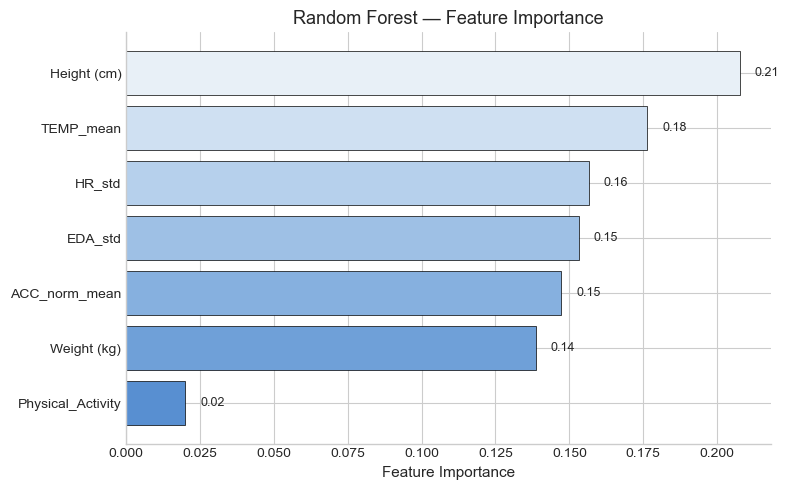

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pastel_blues = [
    "#E8F0F7",
    "#CFE0F2",
    "#B6D0EC",
    "#9EC0E5",
    "#86B0DF",
    "#6FA0D8",
    "#588FD1",
]

# -----------------------------
# Selected features and target
# -----------------------------
selected_features = [
    "EDA_std",
    "HR_std",
    "TEMP_mean",
    "ACC_norm_mean",
    "Height (cm)",
    "Weight (kg)",
    "Physical_Activity"
]

target = "delta_stress"

X = df_segments_final[selected_features].copy()
y = df_segments_final[target].copy()

# (opzionale) controllo NaN
print("NaN in X:", X.isna().sum().sum())
print("NaN in y:", y.isna().sum())

# -----------------------------
# Train / test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# Random Forest + RandomizedSearch
# -----------------------------
param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 4, 6],
    # IMPORTANTE: niente 'auto' per RandomForestRegressor
    "max_features": [None, "sqrt", "log2"],
}

base_model = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# -----------------------------
# Performance on test set
# -----------------------------
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nBest params:", search.best_params_)
print(f"Test R²:   {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")

# -----------------------------
# Feature importances
# -----------------------------
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

sorted_features = [selected_features[i] for i in indices]
sorted_importances = importances[indices]

# Normalizzazione per colore carino
norm_imp = (sorted_importances - sorted_importances.min()) / (
    sorted_importances.max() - sorted_importances.min() + 1e-8
)
colors = pastel_blues

plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances,
         edgecolor="black", color=colors)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance", fontsize=11)
plt.title("Random Forest — Feature Importance", fontsize=13)
# Valore numerico a destra di ogni barra
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.005, i, f"{v:.2f}", va="center", fontsize=9)
plt.tight_layout()
plt.show()


Despite hyperparameter tuning, the Random Forest model achieved a modest predictive performance (R² ≈ 0.15), indicating that only a small proportion of the variability in stress change can be explained by the available features. This is likely due to the low variance of several physiological variables—whose mean and standard deviation remain relatively stable across stages—and the coarse temporal aggregation of the signals, which reduces the richness of the physiological dynamics underlying stress responses. Additionally, anthropometric variable(height) provides limited physiological insight yet dominate the model due to their higher variance. These factors collectively constrain the model’s ability to generalize and capture meaningful associations.

not enough, we should add something more!!!!!

## **Model 2: Random Forest Regressor + IBI signals**

In [58]:
import os
import numpy as np
import pandas as pd

def read_ibi_signals(main_folder):
    """
    Legge i file IBI.csv presenti nelle sottocartelle di `main_folder`.

    Struttura tipica IBI.csv:
    - riga 0: 2 timestamp (es. "2013-02-20 17:55:19,2013-02-20 17:55:19")
    - riga 1: possibile header testuale (es. " IBI, IBI")
    - righe successive: 
        colonna 0 = tempo dall'inizio (s)
        colonna 1 = durata dell'inter-beat interval (s)

    Ritorna:
    - ibi_dict[subject]       -> array 1D con le durate IBI (in secondi)
    - ibi_time_dict[subject]  -> array 1D con i tempi (in secondi dall'inizio)
    - ibi_start_utc_dict[subject] -> stringa con il timestamp iniziale (riga 0)
    """

    ibi_dict = {}
    ibi_time_dict = {}
    ibi_start_utc_dict = {}

    # Sottocartelle = soggetti (es. S01, f01, ...)
    subfolders = next(os.walk(main_folder))[1]

    for folder_name in subfolders:
        ibi_path = os.path.join(main_folder, folder_name, "IBI.csv")

        if not os.path.exists(ibi_path):
            # Alcuni soggetti potrebbero non avere IBI.csv
            continue

        try:
            df = pd.read_csv(ibi_path, header=None)
        except pd.errors.EmptyDataError:
            ibi_dict[folder_name] = np.array([])
            ibi_time_dict[folder_name] = np.array([])
            ibi_start_utc_dict[folder_name] = None
            continue

        # Se non c'è neppure la prima riga, salta
        if df.shape[0] == 0:
            ibi_dict[folder_name] = np.array([])
            ibi_time_dict[folder_name] = np.array([])
            ibi_start_utc_dict[folder_name] = None
            continue

        # Riga 0 = timestamp iniziale (UTC)
        start_utc = df.iloc[0, 0]
        ibi_start_utc_dict[folder_name] = start_utc

        # Dati veri: dalla riga 1 in poi (potrebbe esserci una riga header tipo " IBI")
        data = df.iloc[1:].copy()

        # Converto le prime due colonne in numerico, trasformando tutto ciò che non è numero in NaN
        for col in data.columns[:2]:
            data[col] = pd.to_numeric(data[col], errors="coerce")

        # Elimino le righe che non hanno numeri validi in entrambe le colonne (header compreso)
        data = data.dropna(subset=[data.columns[0], data.columns[1]])

        if data.shape[0] == 0:
            # Nessun dato numerico valido dopo l'header
            ibi_dict[folder_name] = np.array([])
            ibi_time_dict[folder_name] = np.array([])
            continue

        # Ora data contiene solo righe numeriche: colonne 0 = time, 1 = IBI
        values = data[[data.columns[0], data.columns[1]]].values

        ibi_times = values[:, 0].astype(float)   # tempo dall'inizio (s)
        ibi_values = values[:, 1].astype(float)  # IBI (s)

        ibi_dict[folder_name] = ibi_values
        ibi_time_dict[folder_name] = ibi_times

    return ibi_dict, ibi_time_dict, ibi_start_utc_dict


In [59]:
# Path tipo: "/Users/Utente/Desktop/WD/Wearable_Dataset"
stress_folder = os.path.join(dataset_path, "STRESS")

stress_ibi_dict, stress_ibi_time_dict, stress_ibi_start_utc = read_ibi_signals(stress_folder)


In [60]:
def get_stage_bounds(tags_array, protocol, stage_name):
    """
    Restituisce (t_start, t_end) della fase richiesta,
    utilizzando l'indice dei tag corrispondenti alla fase.
    """
    if protocol == "V1":
        idx_map = stage_to_tag_idx_v1
    else:
        idx_map = stage_to_tag_idx_v2

    if stage_name not in idx_map:
        return None, None

    i_start, i_end = idx_map[stage_name]

    # Prende direttamente i tempi dai tag già convertiti in secondi
    t_start = tags_array[i_start]
    t_end   = tags_array[i_end]

    return t_start, t_end


In [61]:
def get_protocol_start_time(tags_array, protocol):
    """
    Ritorna il tempo (in secondi) di inizio del protocollo,
    che nel tuo caso coinciderà con l'inizio della Baseline.
    """
    t_start_baseline, _ = get_stage_bounds(tags_array, protocol, "Baseline")
    return t_start_baseline


def crop_ibi_before_protocol(ibi_times, ibi_values, t_protocol_start):
    """
    Elimina tutti gli IBI che cadono prima dell'inizio del protocollo.
    """
    mask = ibi_times >= t_protocol_start
    return ibi_times[mask], ibi_values[mask]


In [62]:
def compute_hrv_features(ibi_times, ibi_values, t_start, t_end):
    """
    Estrae feature HRV (SDNN, RMSSD, pNN50, mean IBI)
    su un intervallo [t_start, t_end] in secondi.
    """
    mask = (ibi_times >= t_start) & (ibi_times <= t_end)
    ibi_segment = ibi_values[mask]

    feats = {}
    feats["n_ibi"] = int(len(ibi_segment))   # <--- conteggio battiti usati

    if len(ibi_segment) < 2:
        # pochi battiti -> HRV non affidabile
        feats["IBI_mean"] = np.nan
        feats["IBI_std"]  = np.nan
        feats["RMSSD"]    = np.nan
        feats["pNN50"]    = np.nan
        return feats

    feats["IBI_mean"] = float(np.mean(ibi_segment))
    feats["IBI_std"]  = float(np.std(ibi_segment, ddof=1))

    diff = np.diff(ibi_segment)
    feats["RMSSD"] = float(np.sqrt(np.mean(diff ** 2)))
    feats["pNN50"] = float(np.mean(np.abs(diff) > 0.05))

    return feats


In [63]:
# -------------------------------
# Ricostruisco le liste dei soggetti V1 / V2
# esattamente come nei csv Stress_Level
# -------------------------------
subjects_v1 = set(
    stress_level_v1["subject"].astype(str).str.strip().str.lower().values
)
subjects_v2 = set(
    stress_level_v2["subject"].astype(str).str.strip().str.lower().values
)


In [64]:
rows_hrv = []

for subject in participants["STRESS"]:
    
    # come nel Model 1: skippi i soggetti problematici
    if subject in skip_stress_subjects:
        print(f"[INFO] Skipping {subject} (data constraints)")
        continue

    # se non ho IBI per questo soggetto → skip
    if subject not in stress_ibi_dict:
        print(f"[INFO] No IBI data for {subject}, skipping")
        continue

    # segnali e tag (come nel notebook per le altre metriche)
    signals_subj = signal_data["STRESS"][subject]
    tags         = signals_subj["tags"]  # array di tempi (secondi dall'inizio)

    # IBI grezzi
    ibi_values = stress_ibi_dict[subject]
    ibi_times  = stress_ibi_time_dict[subject]

    if len(ibi_values) < 2:
        print(f"[WARNING] Too few IBI for {subject}, skipping")
        continue

    # 1) Trovo l'inizio del protocollo = inizio Baseline
    t_protocol_start, _ = get_stage_interval(subject, tags, "Baseline")
    if t_protocol_start is None:
        print(f"[WARNING] Cannot find Baseline for {subject}")
        continue

    # 2) Taglio gli IBI prima dell'inizio del protocollo
    mask_proto = ibi_times >= t_protocol_start
    ibi_times_cut  = ibi_times[mask_proto]
    ibi_values_cut = ibi_values[mask_proto]

    if len(ibi_values_cut) < 2:
        print(f"[WARNING] Too few IBI after protocol start for {subject}")
        continue

    # 3) scelgo il mapping giusto per iterare sulle fasi
    if subject.startswith("S"):
        stage_map = stage_to_tag_idx_v1
    else:
        stage_map = stage_to_tag_idx_v2

    # 4) per ogni fase del protocollo
    subj_key = subject.strip().lower()  # per lo stress_df (indice in lowercase)

    for stage_name in stage_map.keys():

        # intervallo temporale della fase
        t_start, t_end = get_stage_interval(subject, tags, stage_name)
        if (t_start is None) or (t_end is None):
            # qui *può* succedere se per quel soggetto i tag si fermano prima
            # (ma non è un errore di codice: vuol dire che quella fase non è davvero presente nei TAG)
            continue

        # Valore di stress (SUD) per quella fase e soggetto
        try:
            target_value = stress_df.loc[subj_key, stage_name]
        except KeyError:
            print(f"[WARNING] No stress value for {subject} - {stage_name}")
            continue

        # 5) Calcolo HRV su quella finestra
        hrv_feats = compute_hrv_features(ibi_times_cut, ibi_values_cut, t_start, t_end)

        # se compute_hrv_features restituisce dict vuoto → skip
        if not hrv_feats:
            continue

        # 6) aggiungo info di contesto
        hrv_feats["subject"] = subject
        hrv_feats["stage"]   = stage_name
        hrv_feats["stress"]  = float(target_value)

        rows_hrv.append(hrv_feats)

df_segments_hrv = pd.DataFrame(rows_hrv)
df_segments_hrv.head()


[INFO] Skipping f18 (data constraints)
[INFO] Skipping S02 (data constraints)
[INFO] Skipping f16 (data constraints)
[INFO] Skipping f17 (data constraints)
[INFO] No IBI data for .DS_Store, skipping
[INFO] Skipping f14_b (data constraints)
[INFO] Skipping f15 (data constraints)
[INFO] Skipping f14_a (data constraints)
[INFO] Skipping f07 (data constraints)


,n_ibi,IBI_mean,IBI_std,RMSSD,pNN50,subject,stage,stress
0,57,0.767270,0.057840,0.037409,0.142857,S05,Baseline,1.0
1,87,0.801006,0.049322,0.039729,0.174419,S05,Stroop,2.0
2,177,0.877825,0.066815,0.051433,0.159091,S05,First Rest,1.0
3,160,0.748828,0.075324,0.031882,0.069182,S05,TMCT,4.0
4,84,0.886719,0.069619,0.053553,0.265060,S05,Second Rest,1.0


In [65]:
# Seleziono solo le colonne HRV che mi servono dal df_segments_hrv
hrv_cols = ["subject", "stage", "IBI_mean", "IBI_std", "RMSSD", "pNN50"]

df_model2 = pd.merge(
    df_segments_merged,
    df_segments_hrv[hrv_cols],
    on=["subject", "stage"],
    how="left"   # left così non perdi nessuna riga del dataset principale
)




In [66]:
df_segments_final2 = df_model2.drop(columns=["Info ", "subject"])

In [67]:
# Colonne HRV dove compaiono i NaN
hrv_cols = ["IBI_mean", "IBI_std", "RMSSD", "pNN50"]

for col in hrv_cols:
    if col in df_model2.columns:
        med = df_model2[col].median(skipna=True)
        df_model2[col] = df_model2[col].fillna(med)

# Controllo: quanti NaN restano nelle HRV?
print(df_model2[hrv_cols].isna().sum())


IBI_mean    0
IBI_std     0
RMSSD       0
pNN50       0
dtype: int64


In [68]:
df_model2.head(220)

,EDA_mean,EDA_std,HR_mean,HR_std,TEMP_mean,TEMP_std,BVP_mean,BVP_std,ACC_norm_mean,ACC_norm_std,...,stress_baseline,delta_stress,Info,Height (cm),Weight (kg),Physical_Activity,IBI_mean,IBI_std,RMSSD,pNN50
0,13.655270,0.556619,75.379899,2.622484,33.456768,0.026774,-0.784474,58.484142,63.280494,2.285177,...,1.0,0.0,S05,173,72,1,0.727869,0.063740,0.049837,0.194600
1,15.573678,0.637616,73.815714,2.980611,33.579643,0.060237,0.092666,27.990083,63.601617,0.785838,...,1.0,1.0,S05,173,72,1,0.727869,0.063740,0.049837,0.194600
2,18.587111,1.860067,72.437827,5.380933,33.509226,0.064527,0.077788,86.953025,64.348458,3.540502,...,1.0,0.0,S05,173,72,1,0.727869,0.063740,0.049837,0.194600
3,12.581445,0.682693,80.628757,4.186074,33.648994,0.080145,-0.146176,36.461529,62.200791,0.686385,...,1.0,3.0,S05,173,72,1,0.727869,0.063740,0.049837,0.194600
4,13.969749,0.600660,67.476388,2.225019,33.742026,0.018921,0.164734,69.264081,63.808040,3.227237,...,1.0,0.0,S05,173,72,1,0.727869,0.063740,0.049837,0.194600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.139503,0.611288,83.843817,3.403461,31.988382,0.100539,-0.042326,16.856456,65.100282,0.867133,...,3.0,1.0,f06,169,58,0,0.698229,0.046301,0.052094,0.250000
216,0.480028,0.083619,78.909567,7.590167,31.386173,0.068813,-0.003414,26.402575,64.684140,1.494407,...,3.0,-2.0,f06,169,58,0,0.737012,0.072371,0.055757,0.223944
217,0.455115,0.036204,78.729268,0.936939,31.370000,0.034782,-0.001799,26.049782,64.531155,1.684040,...,3.0,-1.0,f06,169,58,0,0.727869,0.063740,0.049837,0.194600
218,0.648911,0.057168,74.040513,0.754345,31.328462,0.016570,0.078910,30.817358,64.613407,1.317211,...,3.0,0.0,f06,169,58,0,0.729911,0.072008,0.096740,0.500000


In [69]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# --- Feature set da valutare ---
mrmr_features = [
    "EDA_std",
    "HR_std",
    "TEMP_mean",
    "ACC_norm_mean",
    'IBI_mean',
       'IBI_std', 'RMSSD', 'pNN50'
]

# Dataset con feature + target
df_mrmr = df_model2[mrmr_features + ["delta_stress"]].copy()
df_mrmr = df_mrmr.dropna()

X = df_mrmr[mrmr_features]
y = df_mrmr["delta_stress"]



K = X.shape[1]   # così le ordina tutte
ordered_features, mrmr_scores, mi_dict = mrmr_custom_regression(X, y, K=K)

# Costruisco la tabella finale
mrmr_table = pd.DataFrame({
    "feature": ordered_features,
    "mRMR_rank": np.arange(1, len(ordered_features) + 1),
    "mRMR_score": [mrmr_scores[f] for f in ordered_features],
    "MI_with_delta_stress": [mi_dict[f] for f in ordered_features]
})

display(mrmr_table)



,feature,mRMR_rank,mRMR_score,MI_with_delta_stress
0,TEMP_mean,1,0.127429,0.127429
1,HR_std,2,-0.012979,0.011724
2,ACC_norm_mean,3,-0.092170,0.040271
3,IBI_mean,4,-0.095019,0.016777
4,EDA_std,5,-0.195162,0.014049
5,RMSSD,6,-0.207882,0.000000
6,IBI_std,7,-0.323692,0.000000
7,pNN50,8,-0.406508,0.000000


In [70]:



selected_features = [
    "EDA_std",
    "HR_std",
    "TEMP_mean",
    "ACC_norm_mean",
    "Height (cm)",
        "IBI_mean",
    "RMSSD",
    "Weight (kg)",
    "Physical_Activity"
]


## **Model 1**
target = "delta_stress"

X = df_model2[selected_features].copy()
y = df_model2[target].copy()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Test R²:   0.239
Test RMSE: 1.199
Test MAE:  0.927


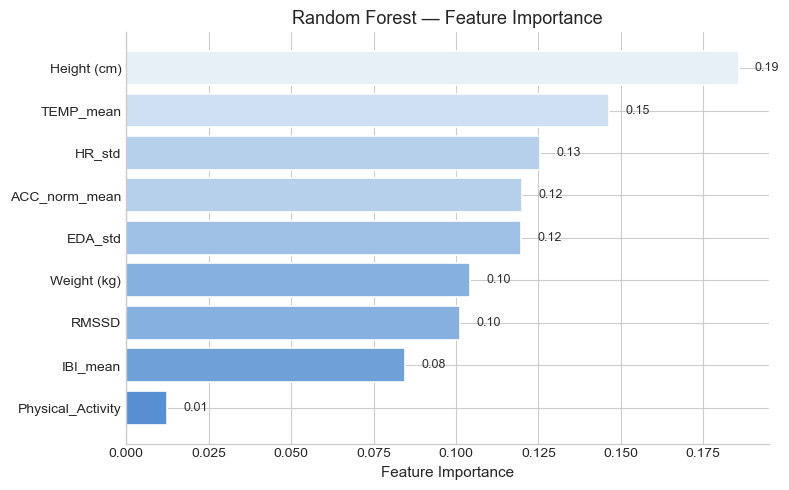

In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -----------------------------
# Train / test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# Random Forest + RandomizedSearch
# -----------------------------
param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 4, 6],
    "max_features": [None, "sqrt", "log2"],
}

base_model = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# -----------------------------
# Metrics on test set
# -----------------------------
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Best params:", search.best_params_)
print(f"Test R²:   {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")

# -----------------------------
# Feature importances — pastel_blues
# -----------------------------
pastel_blues = [
    "#E8F0F7",
    "#CFE0F2",
    "#B6D0EC",
    "#9EC0E5",
    "#86B0DF",
    "#6FA0D8",
    "#588FD1",
]

def pastel_gradient(n, palette=pastel_blues):
    if n == 1:
        return [palette[len(palette)//2]]
    idx = np.linspace(0, len(palette) - 1, n)
    return [palette[int(round(i))] for i in idx]

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

sorted_features = [selected_features[i] for i in indices]
sorted_importances = importances[indices]

colors = pastel_gradient(len(sorted_importances), pastel_blues)

plt.figure(figsize=(8, 5))
plt.barh(
    sorted_features,
    sorted_importances,
    color=colors,
    edgecolor="white",
    linewidth=1.2
)
plt.gca().invert_yaxis()

plt.xlabel("Feature Importance", fontsize=11)
plt.title("Random Forest — Feature Importance", fontsize=13)

# valore numerico accanto a ogni barra
for i, v in enumerate(sorted_importances):
    plt.text(
        v + 0.005,
        i,
        f"{v:.2f}",
        va="center",
        fontsize=9,
        color="#2f2f2f"
    )

plt.tight_layout()
plt.show()

## **Model 3 : Gradient Boosting Regressor with same dataset of model 2**

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


param_dist = {
    "n_estimators": [100, 200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 4, 6],
    "max_features": [None, "sqrt", "log2"],
    "subsample": [0.6, 0.8, 1.0],
}

model = GradientBoostingRegressor(random_state=42)

search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
)

search.fit(X_train, y_train)

# -----------------------------
# Valutazione modello migliore
# -----------------------------
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best params:", search.best_params_)
print("R²:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))

print("Feature importance:", best_model.feature_importances_)


Best params: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.05}
R²: 0.2067684487809427
RMSE: 1.2243410320757764
Feature importance: [0.11502707 0.14557226 0.14826091 0.11255573 0.18312347 0.08674036
 0.0942298  0.09672229 0.0177681 ]


In [36]:

# -----------------------------
# Metrics on test set
# -----------------------------
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Best params:", search.best_params_)
print(f"Test R²:   {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")


Best params: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.05}
Test R²:   0.207
Test RMSE: 1.224
Test MAE:  0.977


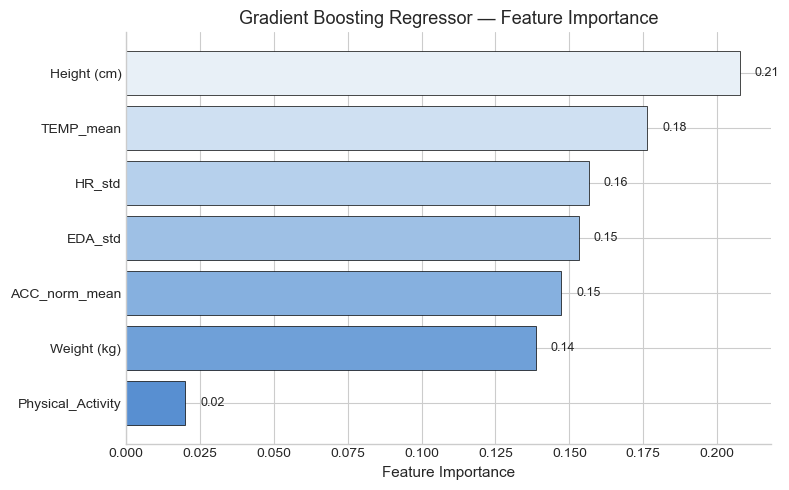

In [52]:
# -----------------------------
# Feature importances (plot carino)
# -----------------------------
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

sorted_features = [selected_features[i] for i in indices]
sorted_importances = importances[indices]

# normalizzo per colormap
norm_imp = (sorted_importances - sorted_importances.min()) / (
    sorted_importances.max() - sorted_importances.min() + 1e-8
)
colors = pastel_blues

plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances,
         edgecolor="black", color=colors)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance", fontsize=11)
plt.title("Gradient Boosting Regressor — Feature Importance", fontsize=13)

# valore numerico accanto a ogni barra
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.005, i, f"{v:.2f}", va="center", fontsize=9)

plt.tight_layout()
plt.show()

## **Model 4 : Gradient Boosting Regression over a New Dataset**



This model aims to **predict the continuous change in self-reported stress** (`delta_stress`). 
To do this, we first compute *baseline-normalized features* for each subject: for every physiological signal (EDA, HR, temperature, BVP, acceleration, and IBI-based HRV metrics), we subtract the subject’s baseline value from the value observed during the stress protocol. We also derive additional HRV indices (CVRR and CVSD).  
This design focuses the model on **within-subject physiological changes** instead of absolute signal levels, which naturally differ across individuals.

We then select a compact set of interpretable features:

- `delta_EDA_std`, `delta_HR_std`, `delta_TEMP_mean`  
- `delta_ACC_norm_mean`, `delta_IBI_mean`, `delta_RMSSD`  
- `CVRR`, `CVSD`  
- anthropometric and lifestyle factors: `Height (cm)`, `Weight (kg)`, `Physical_Activity`

The predictive model is implemented as a **Gradient Boosting Regressor** inside a pipeline with feature standardization.  
To assess its ability to generalize to **new, unseen subjects**, we use **Leave-One-Subject-Out (LOSO) cross-validation**: in each fold, one subject is completely held out for testing, while the model is trained on all the others.

Model performance is evaluated using:

- **R²** (coefficient of determination)  
- **RMSE** (root mean squared error)  
- **MAE** (mean absolute error)  




Shape X: (191, 11)
Shape y: (191,)
N subjects: 29
Subjects: ['s05' 'f11' 'f10' 's03' 's04' 'f03' 'f04' 's17' 's10' 's11' 's16' 'f05'
 'f02' 's18' 's01' 's06' 's08' 'f12' 's09' 'f13' 's07' 's13' 'f09' 's14'
 's15' 's12' 'f08' 'f01' 'f06']

===== LOSO RESULTS (per-fold) =====
Mean R²:    -1.571  ± 1.530
Mean RMSE:  1.731  ± 0.765
Mean MAE:   1.499  ± 0.686

===== GLOBAL PERFORMANCE (all LOSO folds) =====
Global R²:   -0.152
Global RMSE: 1.873
Global MAE:  1.479

Per-subject LOSO scores:
   subject_left_out        R2      RMSE       MAE
14              s04 -6.687167  2.441614  2.160054
19              s09 -4.595334  2.827249  2.610717
25              s15 -4.258831  1.465081  1.238298
23              s13 -3.018074  1.460151  1.296948
6               f08 -2.592247  1.447576  1.386013
18              s08 -2.582031  3.064913  2.539683
10              f12 -2.466937  3.723942  3.305533
1               f02 -2.142475  2.210949  1.941627
0               f01 -1.989607  1.845218  1.597503
3         

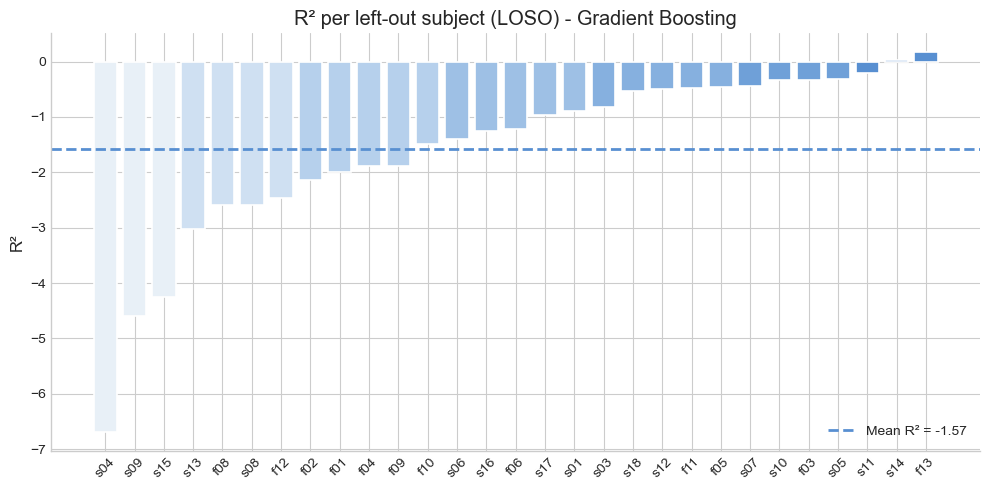

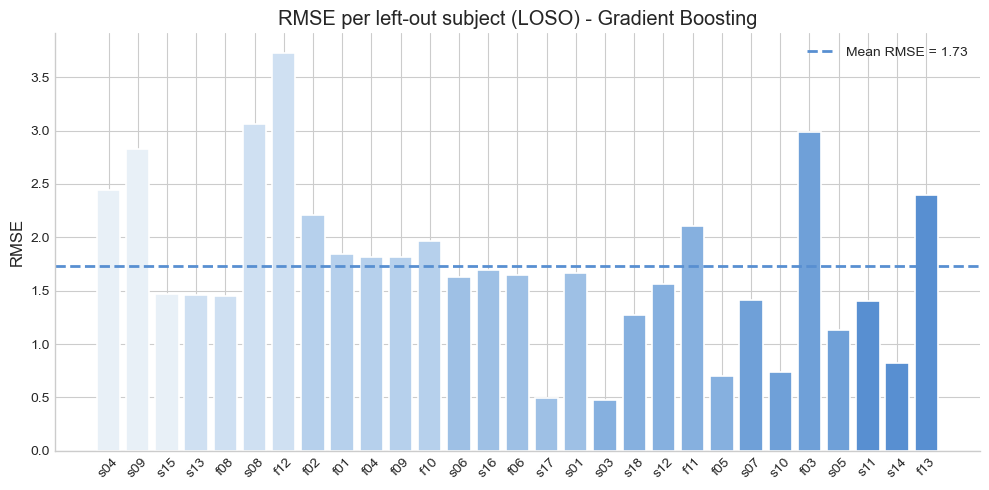

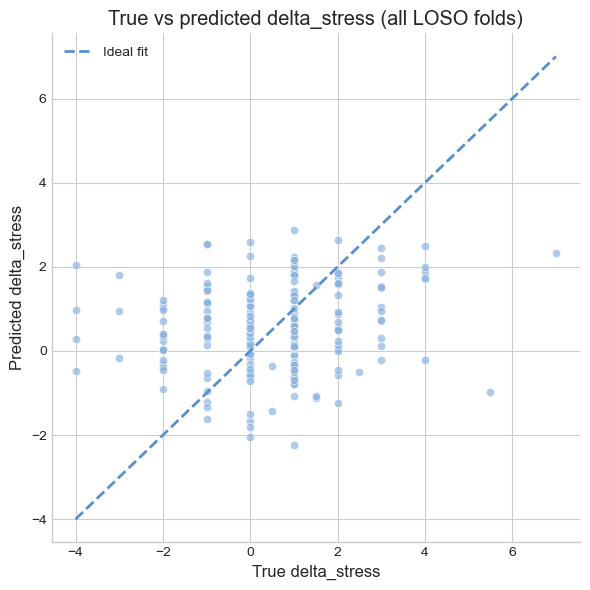

In [55]:
# ============================================
# 1. Copy base dataframe
# ============================================
df = df_model2.copy()   # <- make sure df_model2 already exists

# Ensure Height and Weight are numeric
df["Height (cm)"] = pd.to_numeric(df["Height (cm)"], errors="coerce")
df["Weight (kg)"] = pd.to_numeric(df["Weight (kg)"], errors="coerce")

# ============================================
# 2. Define base physiological features
# ============================================
signal_feats = [
    "EDA_mean", "EDA_std",
    "HR_mean", "HR_std",
    "TEMP_mean", "TEMP_std",
    "BVP_mean", "BVP_std",
    "ACC_norm_mean", "ACC_norm_std",
    "IBI_mean", "IBI_std",
    "RMSSD", "pNN50"
]

# ============================================
# 3. Compute baseline per subject (stage == Baseline)
# ============================================
baseline_df = (
    df[df["stage"] == "Baseline"]
    .groupby("subject")[signal_feats]
    .mean()
)

# Rename columns with baseline_ prefix
baseline_df = baseline_df.add_prefix("baseline_")

# Merge baseline info back into the full dataframe
df = df.merge(
    baseline_df,
    on="subject",
    how="left"
)

# ============================================
# 4. Compute delta features: value - baseline_value
# ============================================
for feat in signal_feats:
    base_col = f"baseline_{feat}"
    if base_col in df.columns:
        df[f"delta_{feat}"] = df[feat] - df[base_col]
    else:
        df[f"delta_{feat}"] = np.nan

# ============================================
# 5. Derived HRV metrics: CVRR and CVSD
#    (with safe division)
# ============================================
df["CVRR"] = np.where(
    (df["IBI_mean"] != 0) & (~df["IBI_mean"].isna()),
    df["RMSSD"] / df["IBI_mean"],
    np.nan
)

df["CVSD"] = np.where(
    (df["IBI_std"] != 0) & (~df["IBI_std"].isna()),
    df["RMSSD"] / df["IBI_std"],
    np.nan
)

# ============================================
# 6. Keep only stress protocol phases
#    (exclude Baseline rows)
# ============================================
df_model = df[df["stage"] != "Baseline"].copy()

# ============================================
# 7. Final feature set (YOUR CHOICE)
# ============================================
feature_cols = [
    "delta_EDA_std",
    "delta_HR_std",
    "delta_TEMP_mean",
    "delta_ACC_norm_mean",
    "delta_IBI_mean",
    "delta_RMSSD",
    "CVRR", "CVSD",
    "Height (cm)", "Weight (kg)", "Physical_Activity"
]

# ============================================
# 8. Drop rows with missing values in
#    features, target or subject column
# ============================================
cols_needed = feature_cols + ["delta_stress", "subject"]
df_model = df_model.dropna(subset=cols_needed).copy()

X = df_model[feature_cols]
y = df_model["delta_stress"]
groups = df_model["subject"]   # used for LOSO

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("N subjects:", df_model["subject"].nunique())
print("Subjects:", df_model["subject"].unique())

# ============================================
# 9. Pipeline: StandardScaler + GB Regressor
# ============================================
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor(
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8
    )),
])

# ============================================
# 10. Leave-One-Subject-Out CV (LOSO)
# ============================================
logo = LeaveOneGroupOut()

r2_scores = []
rmse_scores = []
mae_scores = []
subjects_left_out = []

all_y_true = []
all_y_pred = []

for train_idx, test_idx in logo.split(X, y, groups):
    subj_test = groups.iloc[test_idx].iloc[0]
    subjects_left_out.append(subj_test)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Per-fold metrics
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

    # Store global predictions
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())

# Convert to numpy arrays for convenience
r2_scores = np.array(r2_scores)
rmse_scores = np.array(rmse_scores)
mae_scores = np.array(mae_scores)

print("\n===== LOSO RESULTS (per-fold) =====")
print(f"Mean R²:    {r2_scores.mean():.3f}  ± {r2_scores.std():.3f}")
print(f"Mean RMSE:  {rmse_scores.mean():.3f}  ± {rmse_scores.std():.3f}")
print(f"Mean MAE:   {mae_scores.mean():.3f}  ± {mae_scores.std():.3f}")

# ============================================
# 11. Global metrics (all folds together)
# ============================================
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

global_r2 = r2_score(all_y_true, all_y_pred)
global_rmse = np.sqrt(mean_squared_error(all_y_true, all_y_pred))
global_mae = mean_absolute_error(all_y_true, all_y_pred)

print("\n===== GLOBAL PERFORMANCE (all LOSO folds) =====")
print(f"Global R²:   {global_r2:.3f}")
print(f"Global RMSE: {global_rmse:.3f}")
print(f"Global MAE:  {global_mae:.3f}")

# ============================================
# 12. Per-subject table
# ============================================
results_per_subject = pd.DataFrame({
    "subject_left_out": subjects_left_out,
    "R2": r2_scores,
    "RMSE": rmse_scores,
    "MAE": mae_scores
}).sort_values("R2")

print("\nPer-subject LOSO scores:")
print(results_per_subject)

# ============================================
# 13. PLOTS – pastel_blues
# ============================================

# Pastel sequential palette (light -> darker, but still soft)
pastel_blues = [
    "#E8F0F7",
    "#CFE0F2",
    "#B6D0EC",
    "#9EC0E5",
    "#86B0DF",
    "#6FA0D8",
    "#588FD1",
]

def pastel_gradient(n: int, palette=pastel_blues):
    """Return n colors sampled evenly from the given pastel palette."""
    if n <= 0:
        return []
    if n == 1:
        return [palette[len(palette)//2]]
    idx = np.linspace(0, len(palette) - 1, n)
    return [palette[int(round(i))] for i in idx]

# ---- A. Barplot R² per subject ----
plt.figure(figsize=(10, 5))
bar_colors = pastel_gradient(len(results_per_subject), pastel_blues)

plt.bar(
    range(len(results_per_subject)),
    results_per_subject["R2"].values,
    color=bar_colors,
    edgecolor="white",
    linewidth=1.2
)
plt.xticks(
    range(len(results_per_subject)),
    results_per_subject["subject_left_out"],
    rotation=45
)
plt.axhline(
    r2_scores.mean(),
    color=pastel_blues[-1],   # stesso tono più scuro, ma sempre pastello
    linestyle="--",
    linewidth=2,
    label=f"Mean R² = {r2_scores.mean():.2f}"
)
plt.ylabel("R²")
plt.title("R² per left-out subject (LOSO) - Gradient Boosting")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# ---- B. Barplot RMSE per subject ----
plt.figure(figsize=(10, 5))
bar_colors = pastel_gradient(len(results_per_subject), pastel_blues)

plt.bar(
    range(len(results_per_subject)),
    results_per_subject["RMSE"].values,
    color=bar_colors,
    edgecolor="white",
    linewidth=1.2
)
plt.xticks(
    range(len(results_per_subject)),
    results_per_subject["subject_left_out"],
    rotation=45
)
plt.axhline(
    rmse_scores.mean(),
    color=pastel_blues[-1],
    linestyle="--",
    linewidth=2,
    label=f"Mean RMSE = {rmse_scores.mean():.2f}"
)
plt.ylabel("RMSE")
plt.title("RMSE per left-out subject (LOSO) - Gradient Boosting")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# ---- C. Global scatter: true vs predicted delta_stress ----
plt.figure(figsize=(6, 6))
plt.scatter(
    all_y_true, all_y_pred,
    alpha=0.65,
    color=pastel_blues[4],   # un medio pastello
    edgecolor="white",
    linewidth=0.6
)
min_val = min(all_y_true.min(), all_y_pred.min())
max_val = max(all_y_true.max(), all_y_pred.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    linewidth=2,
    color=pastel_blues[-1],
    label="Ideal fit"
)
plt.xlabel("True delta_stress")
plt.ylabel("Predicted delta_stress")
plt.title("True vs predicted delta_stress (all LOSO folds)")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

## **Model 5 : XGBoost Classification with same dataset of model 4**



This model aims to classify whether a subject experiences an increase in stress during the task, relative to their own physiological baseline.  
To do so, we compute *baseline-normalized features* (“delta features”), obtained by subtracting the subject’s baseline value from the corresponding task value for several physiological signals (EDA, HR, temperature, acceleration, and IBI-derived HRV metrics).  
This approach focuses the model on *within-subject physiological changes*, reducing the impact of natural inter-individual differences.

Given the strong variability in stress responses across subjects, the evaluation relies on **Leave-One-Subject-Out (LOSO) cross-validation**.  
In each fold, one subject is entirely excluded from training and used only for testing, allowing us to assess the model’s ability to **generalize to unseen individuals**.

The classifier is implemented using **XGBoost**, embedded in a pipeline with feature standardization.  
For each trial, the model predicts the probability of stress increase (`delta_stress > 0`).  
Performance is assessed using balanced accuracy, ROC–AUC, and aggregated confusion matrices, offering insights into both global performance and subject-specific variability.


In [72]:


# =====================================================
# 1. Copy base dataframe
# =====================================================
df = df_model2.copy()

# Ensure Height and Weight are numeric
df["Height (cm)"] = pd.to_numeric(df["Height (cm)"], errors="coerce")
df["Weight (kg)"] = pd.to_numeric(df["Weight (kg)"], errors="coerce")

# =====================================================
# 2. Base physiological features
# =====================================================
signal_feats = [
    "EDA_mean", "EDA_std",
    "HR_mean","HR_std",
    "TEMP_mean", "TEMP_std",
    "BVP_mean", "BVP_std",
    "ACC_norm_mean", "ACC_norm_std",
    "IBI_mean", "IBI_std",
    "RMSSD", "pNN50"
]

missing = [c for c in signal_feats if c not in df.columns]
if missing:
    print("WARNING: missing columns:", missing)

# =====================================================
# 3. Baseline per subject (stage == 'Baseline')
# =====================================================
baseline_df = (
    df[df["stage"] == "Baseline"]
    .groupby("subject")[signal_feats]
    .mean()
)

baseline_df = baseline_df.add_prefix("baseline_")
df = df.merge(baseline_df, on="subject", how="left")

# =====================================================
# 4. Delta features = value - baseline_value
# =====================================================
for feat in signal_feats:
    base_col = f"baseline_{feat}"
    if base_col in df.columns:
        df[f"delta_{feat}"] = df[feat] - df[base_col]
    else:
        df[f"delta_{feat}"] = np.nan

# =====================================================
# 5. HRV-derived metrics: CVRR, CVSD (safe division)
# =====================================================
df["CVRR"] = np.where(
    (df["IBI_mean"] != 0) & (~df["IBI_mean"].isna()),
    df["RMSSD"] / df["IBI_mean"],
    np.nan
)

df["CVSD"] = np.where(
    (df["IBI_std"] != 0) & (~df["IBI_std"].isna()),
    df["RMSSD"] / df["IBI_std"],
    np.nan
)

# =====================================================
# 6. Keep only non-baseline stages
# =====================================================
df_model = df[df["stage"] != "Baseline"].copy()

# =====================================================
# 7. Final feature set (as you decided)
# =====================================================
feature_cols = [
    "delta_EDA_std",
    "delta_HR_std",
    "delta_TEMP_mean",
    "delta_ACC_norm_mean",
    "delta_IBI_mean",
    "delta_RMSSD",
    "CVRR", "CVSD",
    "Height (cm)", "Weight (kg)", "Physical_Activity"
]

# Binary target: 1 if delta_stress > 0 (stress increase), 0 otherwise
df_model["y_bin"] = (df_model["delta_stress"] > 0).astype(int)

# Drop rows with missing values in features / target / subject
cols_needed = feature_cols + ["y_bin", "subject"]
df_model = df_model.dropna(subset=cols_needed).copy()

X = df_model[feature_cols]
y = df_model["y_bin"]
groups = df_model["subject"]

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("N subjects:", groups.nunique())
print("Class distribution (0=no increase, 1=increase):")
print(y.value_counts())

# =====================================================
# 8. Pipeline: StandardScaler + XGBoost classifier
# =====================================================
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        objective="binary:logistic",
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        reg_alpha=0.1,
        n_jobs=-1,
        eval_metric="logloss"
    )),
])

# =====================================================
# 9. LOSO CV + metrics collection
# =====================================================
logo = LeaveOneGroupOut()

acc_scores = []
bal_acc_scores = []
auc_scores = []
subjects_left_out = []

all_y_true = []
all_y_pred = []
all_y_proba = []
feature_importances = []

for train_idx, test_idx in logo.split(X, y, groups):
    subj_test = groups.iloc[test_idx].iloc[0]
    subjects_left_out.append(subj_test)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipe.fit(X_train, y_train)

    model = pipe.named_steps["model"]
    feature_importances.append(model.feature_importances_)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())
    all_y_proba.extend(y_proba.tolist())

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    if len(np.unique(y_test)) == 2:
        auc_fold = roc_auc_score(y_test, y_proba)
    else:
        auc_fold = np.nan

    acc_scores.append(acc)
    bal_acc_scores.append(bal_acc)
    auc_scores.append(auc_fold)

print("\n===== LOSO XGBoost CLASSIFICATION RESULTS =====")
print("Mean Accuracy:          ", np.mean(acc_scores))
print("Std Accuracy:           ", np.std(acc_scores))
print("Mean Balanced Accuracy: ", np.mean(bal_acc_scores))
print("Std Balanced Accuracy:  ", np.std(bal_acc_scores))
print("Mean AUC (ignoring NaN):", np.nanmean(auc_scores))


Shape X: (191, 11)
Shape y: (191,)
N subjects: 29
Class distribution (0=no increase, 1=increase):
y_bin
1    96
0    95
Name: count, dtype: int64


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classificatio


===== LOSO XGBoost CLASSIFICATION RESULTS =====
Mean Accuracy:           0.5123152709359606
Std Accuracy:            0.3053988552256411
Mean Balanced Accuracy:  0.5188013136288997
Std Balanced Accuracy:   0.3063810991456073
Mean AUC (ignoring NaN): 0.5904761904761906


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classificatio


===== LOSO XGBoost CLASSIFICATION RESULTS =====
Mean Accuracy:           0.5123152709359606
Std Accuracy:            0.3053988552256411
Mean Balanced Accuracy:  0.5188013136288997
Std Balanced Accuracy:   0.3063810991456073
Mean AUC (ignoring NaN): 0.5904761904761906

Results per subject:
   subject_left_out  Accuracy  Balanced_Accuracy       AUC
0               f01  0.333333           0.500000  0.500000
1               f02  0.333333           0.200000  0.200000
2               f03  0.666667           0.625000  0.625000
3               f04  0.666667           0.800000  1.000000
4               f05  0.666667           0.800000  1.000000
5               f06  0.500000           0.700000  0.800000
6               f08  0.166667           0.166667       NaN
7               f09  0.500000           0.300000  0.600000
8               f10  0.166667           0.100000  0.200000
9               f11  0.500000           0.625000  0.875000
10              f12  0.166667           0.500000  0.400000
1

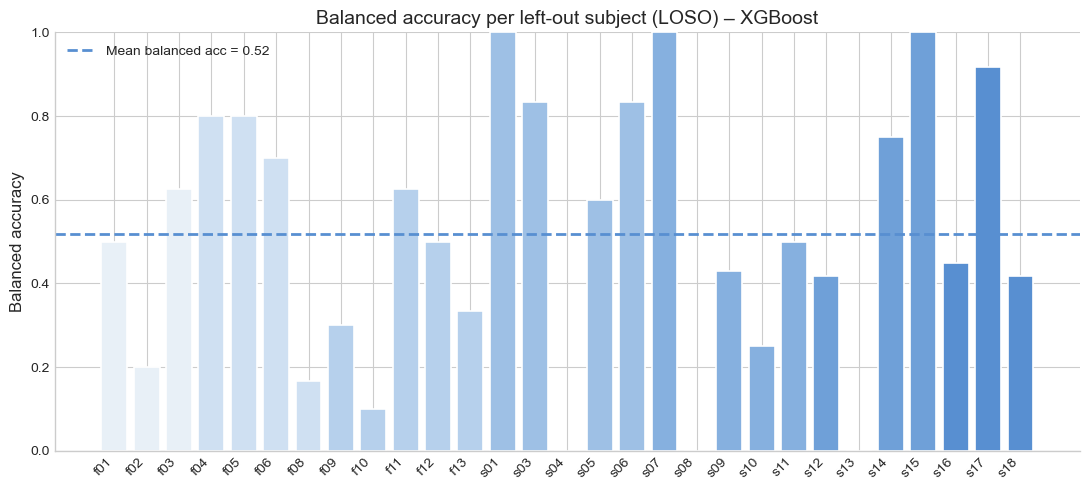

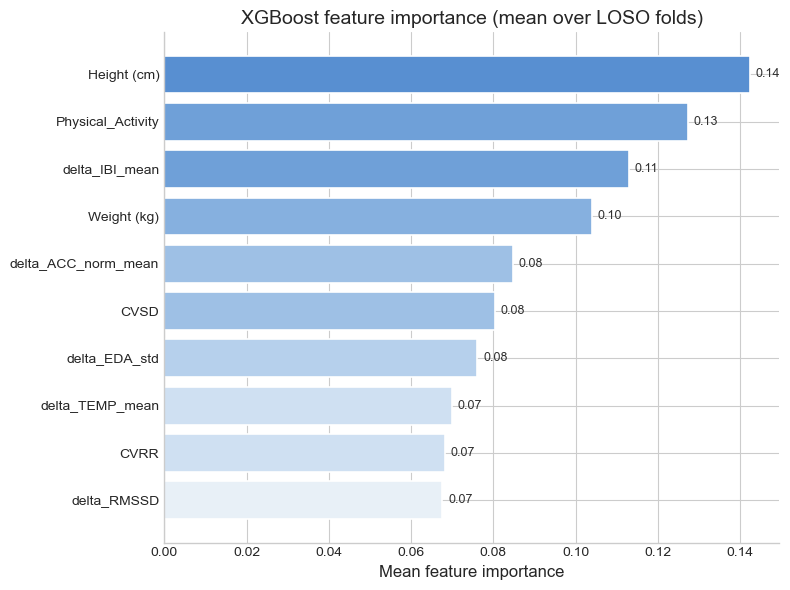

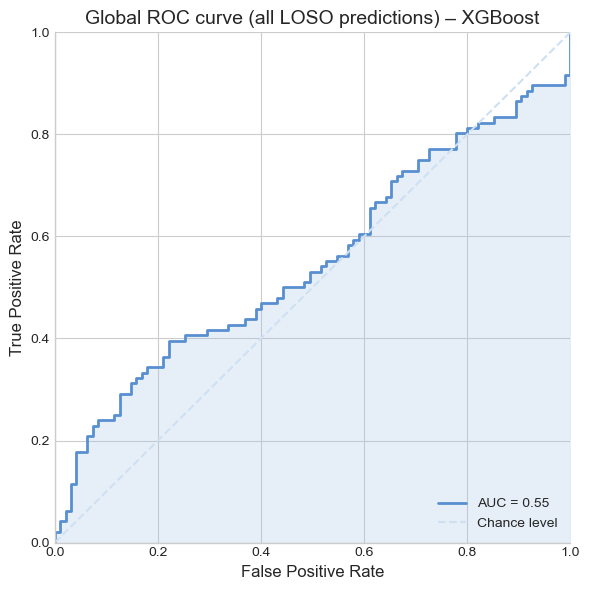

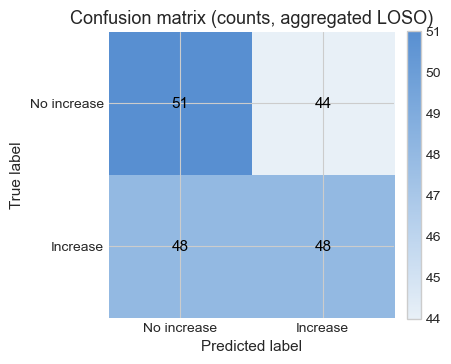

Exception ignored in: <function ResourceTracker.__del__ at 0x104121bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1066edbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102435bc0>
Traceback (most recent call last

In [73]:
# =====================================================
# 9. LOSO CV + metrics collection
# =====================================================
logo = LeaveOneGroupOut()

acc_scores = []
bal_acc_scores = []
auc_scores = []
subjects_left_out = []

all_y_true = []
all_y_pred = []
all_y_proba = []
feature_importances = []

for train_idx, test_idx in logo.split(X, y, groups):
    # soggetto lasciato fuori in questo fold
    subj_test = groups.iloc[test_idx].iloc[0]
    subjects_left_out.append(subj_test)

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # fit pipeline
    pipe.fit(X_train, y_train)

    # prendo il modello XGBoost dentro la pipeline
    model = pipe.named_steps["model"]
    feature_importances.append(model.feature_importances_)

    # predizioni
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    # salviamo tutte le predizioni per analisi globali
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())
    all_y_proba.extend(y_proba.tolist())

    # metriche per questo fold
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    # AUC solo se entrambe le classi sono presenti nel test
    if len(np.unique(y_test)) == 2:
        auc_fold = roc_auc_score(y_test, y_proba)
    else:
        auc_fold = np.nan

    acc_scores.append(acc)
    bal_acc_scores.append(bal_acc)
    auc_scores.append(auc_fold)

print("\n===== LOSO XGBoost CLASSIFICATION RESULTS =====")
print("Mean Accuracy:          ", np.mean(acc_scores))
print("Std Accuracy:           ", np.std(acc_scores))
print("Mean Balanced Accuracy: ", np.mean(bal_acc_scores))
print("Std Balanced Accuracy:  ", np.std(bal_acc_scores))
print("Mean AUC (ignoring NaN):", np.nanmean(auc_scores))

# =====================================================
# 9b. DataFrame con i risultati per soggetto
# =====================================================
results_per_subject = pd.DataFrame({
    "subject_left_out": subjects_left_out,
    "Accuracy": acc_scores,
    "Balanced_Accuracy": bal_acc_scores,
    "AUC": auc_scores,
})

print("\nResults per subject:")
print(results_per_subject)
# =====================================================
# 10. PLOTTING – PASTEL STYLE (pastel_blues)
# =====================================================
plt.style.use("seaborn-v0_8-whitegrid")

pastel_blues = [
    "#E8F0F7",
    "#CFE0F2",
    "#B6D0EC",
    "#9EC0E5",
    "#86B0DF",
    "#6FA0D8",
    "#588FD1",
]

def pastel_gradient(n, palette=pastel_blues):
    if n <= 0:
        return []
    if n == 1:
        return [palette[len(palette)//2]]
    idx = np.linspace(0, len(palette) - 1, n)
    return [palette[int(round(i))] for i in idx]

# ---------- 10. Balanced accuracy per soggetto ----------
mean_bal_acc = results_per_subject["Balanced_Accuracy"].mean()

fig, ax = plt.subplots(figsize=(11, 5))

n_subj = len(results_per_subject)
colors_bars = pastel_gradient(n_subj, pastel_blues)

ax.bar(
    range(n_subj),
    results_per_subject["Balanced_Accuracy"].values,
    color=colors_bars,
    edgecolor="white",
    linewidth=1.2
)

ax.axhline(
    mean_bal_acc,
    color=pastel_blues[-1],
    linestyle="--",
    linewidth=2,
    label=f"Mean balanced acc = {mean_bal_acc:.2f}"
)

ax.set_xticks(range(n_subj))
ax.set_xticklabels(results_per_subject["subject_left_out"], rotation=45, ha="right")
ax.set_ylim(0, 1)
ax.set_ylabel("Balanced accuracy", fontsize=12)
ax.set_title("Balanced accuracy per left-out subject (LOSO) – XGBoost", fontsize=14)
ax.legend(frameon=False)
fig.tight_layout()
plt.show()

# ---------- 11. Mean feature importance (top 10) ----------
feature_importances_arr = np.array(feature_importances)  # shape = (n_folds, n_features)
mean_importance = feature_importances_arr.mean(axis=0)

# ✅ nomi feature robusti: usa le colonne reali di X (non feature_cols se non coincidono)
feature_names = list(X.columns)
if len(feature_names) != len(mean_importance):
    raise ValueError(
        f"Mismatch: mean_importance has {len(mean_importance)} values, "
        f"but X has {len(feature_names)} columns."
    )

idx_sorted = np.argsort(mean_importance)[::-1]
top_n = min(10, len(mean_importance))
top_idx = idx_sorted[:top_n]

top_features = [feature_names[i] for i in top_idx]
top_importances = mean_importance[top_idx]

fig, ax = plt.subplots(figsize=(8, 6))

# più importante = leggermente più scuro (ma sempre pastello)
colors_feats = pastel_gradient(top_n, pastel_blues)[::-1]

ax.barh(
    range(top_n),
    top_importances,
    color=colors_feats,
    edgecolor="white",
    linewidth=1.2
)
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features)
ax.invert_yaxis()

ax.set_xlabel("Mean feature importance", fontsize=12)
ax.set_title("XGBoost feature importance (mean over LOSO folds)", fontsize=14)

# numeri accanto alle barre
for i, v in enumerate(top_importances):
    ax.text(v + (top_importances.max() * 0.01), i, f"{v:.2f}", va="center", fontsize=9, color="#2f2f2f")

fig.tight_layout()
plt.show()

# ---------- 12. Global ROC curve ----------
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(
    fpr,
    tpr,
    linewidth=2,
    color=pastel_blues[-1],
    label=f"AUC = {roc_auc:.2f}"
)
ax.fill_between(
    fpr,
    tpr,
    alpha=0.25,
    color=pastel_blues[3]
)

ax.plot(
    [0, 1],
    [0, 1],
    linestyle="--",
    color=pastel_blues[1],
    label="Chance level"
)

ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.set_title("Global ROC curve (all LOSO predictions) – XGBoost", fontsize=14)
ax.legend(loc="lower right", frameon=False)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

# ---------- 13. Confusion matrix aggregata ----------
cm = confusion_matrix(all_y_true, all_y_pred, labels=[0, 1])

# costruisco una colormap "pastel_blues" (discreta) per imshow
from matplotlib.colors import LinearSegmentedColormap
pastel_cmap = LinearSegmentedColormap.from_list("pastel_blues_cmap", pastel_blues)

fig, ax = plt.subplots(figsize=(4.5, 4))

im = ax.imshow(cm, cmap=pastel_cmap, interpolation="nearest")

ax.set_title("Confusion matrix (counts, aggregated LOSO)", fontsize=13)
ax.set_xlabel("Predicted label", fontsize=11)
ax.set_ylabel("True label", fontsize=11)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["No increase", "Increase"])
ax.set_yticklabels(["No increase", "Increase"])

for spine in ax.spines.values():
    spine.set_visible(False)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", fontsize=11, color="black")

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
fig.tight_layout()
plt.show()